In [63]:
#Import required libraries
import pandas as pd
import numpy as np

In [64]:
# load the two datasets
holiday_dates = pd.read_csv('US_Holiday_Dates_(2004-2021).csv')
ecommerce_data = pd.read_csv('Ecommerce_Data.csv')

In [65]:
# Drop the rows with missing values in both the datasets
holiday_dates = holiday_dates.dropna()
ecommerce_data = ecommerce_data.dropna()

In [66]:
#Add a Amount column to ecommerce dataset using quantity and unit price attributes
ecommerce_data['Amount']=ecommerce_data['Quantity'] * ecommerce_data['UnitPrice']

In [70]:
# merge the two datasets based on the Date column
merged_data = pd.merge(holiday_dates, ecommerce_data, on='Date', how='left')

In [84]:
# sort the holidays by revenue in descending order
sorted_holidays = holiday_revenue.sort_values(ascending=False)

In [85]:
# segment the holidays based on customer expenditure
high_spending_holidays = sorted_holidays[sorted_holidays >= sorted_holidays.mean()]
low_spending_holidays = sorted_holidays[sorted_holidays < sorted_holidays.mean()]

High spending holidays:
Holiday
Thanksgiving Eve         13492.77
Columbus Day              8868.29
Veterans Day              7032.45
4th of July               6776.75
Labor Day                 6733.90
Thanksgiving Day          6232.85
Washington's Birthday     5796.19
Valentine’s Day           4896.18
Juneteenth                4431.40
Name: Amount, dtype: float64

Low spending holidays:
Holiday
Labor Day Weekend              3636.26
Martin Luther King, Jr. Day    3311.82
Memorial Day                      0.00
New Year’s Eve                    0.00
New Year's Day                    0.00
Christmas Day                     0.00
Eastern Easter                    0.00
Christmas Eve                     0.00
Western Easter                    0.00
Name: Amount, dtype: float64


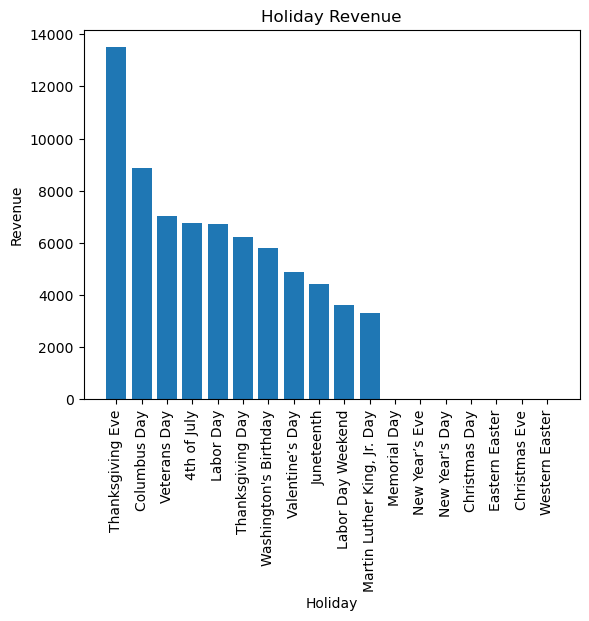

In [86]:
print('High spending holidays:')
print(high_spending_holidays)
print('\nLow spending holidays:')
print(low_spending_holidays)


plt.bar(sorted_holidays.index, sorted_holidays.values)
plt.title('Holiday Revenue')
plt.xlabel('Holiday')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

In [87]:
#Calculating total revenue
total_revenue = ecommerce_data['Amount'].sum()
print('Total revenue: $', total_revenue)

Total revenue: $ 1643139.201


In [88]:
#Avg. Revenue
num_customers = ecommerce_data['CustomerID'].nunique()
avg_revenue_per_customer = total_revenue / num_customers
print('Average revenue per customer: $', avg_revenue_per_customer)

Average revenue per customer: $ 399.6933108732668


In [93]:
# defining a function to group the sales data by different customer attributes
def analyze_sales_by_customer_attribute(attribute):
    sales_by_attribute = merged_data.groupby([attribute, 'Holiday']).sum()['Amount']
    return sales_by_attribute

Sales by country:
Country         Holiday                    
Australia       Labor Day                         16.50
                Martin Luther King, Jr. Day       67.35
                Thanksgiving Day                  34.00
Belgium         Columbus Day                      55.80
                Washington's Birthday             54.21
                                                 ...   
United Kingdom  Thanksgiving Day                4913.46
                Thanksgiving Eve               10948.24
                Valentine’s Day                 4102.20
                Veterans Day                    5404.10
                Washington's Birthday           1802.16
Name: Amount, Length: 63, dtype: float64


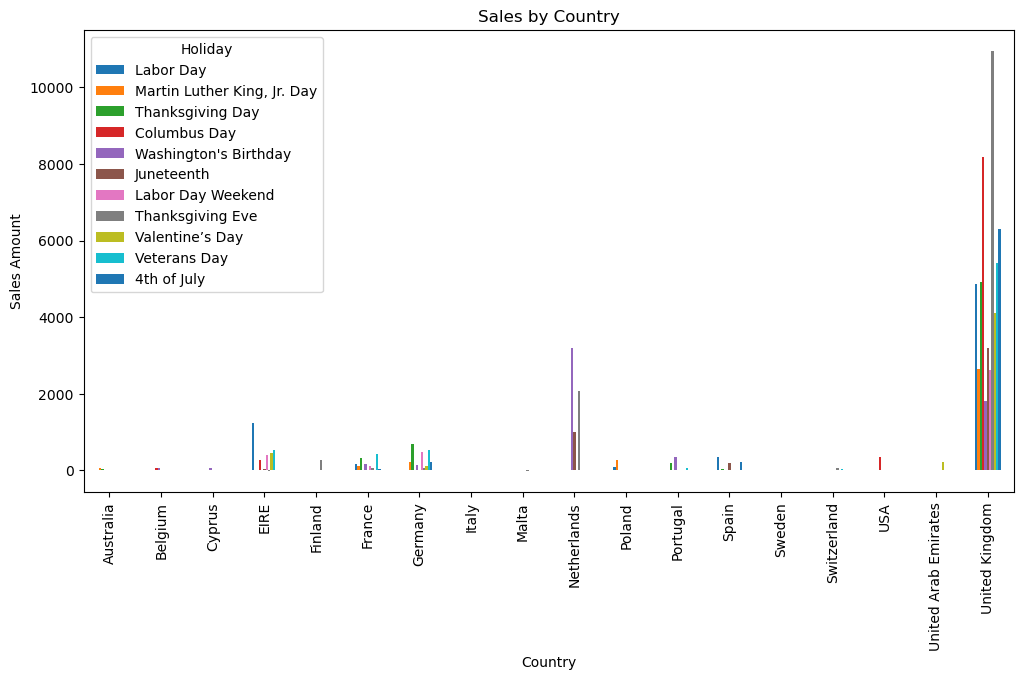

In [100]:
# analyze sales by customer country
sales_by_country = analyze_sales_by_customer_attribute('Country')
print('Sales by country:')
print(sales_by_country)

sales_by_country.unstack().plot(kind='bar', figsize=(12,6))

# add labels and title
plt.xlabel('Country')
plt.ylabel('Sales Amount')
plt.title('Sales by Country')

# show the plot
plt.show()


Sales by weekday:
WeekDay    Holiday         
Friday     4th of July             0.00
           Christmas Day           0.00
           Christmas Eve           0.00
           Juneteenth              0.00
           New Year's Day          0.00
                                 ...   
Wednesday  New Year's Day          0.00
           New Year’s Eve          0.00
           Thanksgiving Eve    13492.77
           Valentine’s Day         0.00
           Veterans Day            0.00
Name: Amount, Length: 67, dtype: float64


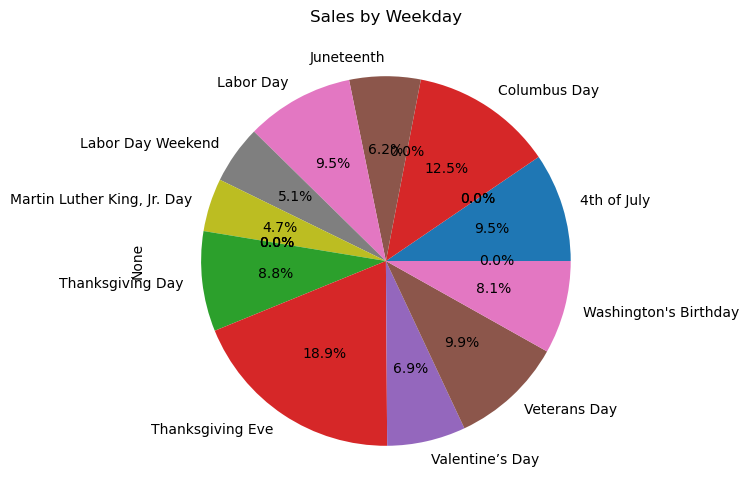

In [108]:
# analyze sales by customer weekday
sales_by_weekday = analyze_sales_by_customer_attribute('WeekDay')
print('\nSales by weekday:')
print(sales_by_weekday)

sales_by_weekday.unstack().sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')


plt.title('Sales by Weekday')

# show the plot
plt.show()



Sales by month:
Month  Holiday                    
1      Martin Luther King, Jr. Day     3311.82
       New Year's Day                     0.00
2      Valentine’s Day                 4896.18
       Washington's Birthday           5796.19
3      Western Easter                     0.00
4      Eastern Easter                     0.00
       Western Easter                     0.00
5      Eastern Easter                     0.00
       Memorial Day                       0.00
6      Juneteenth                      4431.40
7      4th of July                     6776.75
9      Labor Day                       6733.90
       Labor Day Weekend               3636.26
10     Columbus Day                    8868.29
11     Thanksgiving Day                6232.85
       Thanksgiving Eve               13492.77
       Veterans Day                    7032.45
12     Christmas Day                      0.00
       Christmas Eve                      0.00
       New Year’s Eve                     0.00
Name: Am

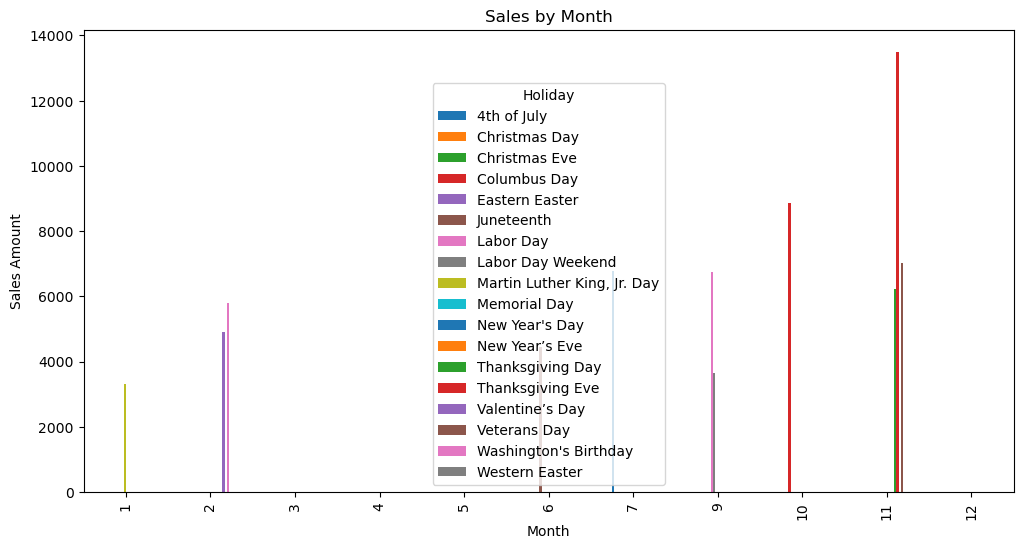

In [114]:
# analyze sales by customer month
sales_by_month = analyze_sales_by_customer_attribute('Month')
print('\nSales by month:')
print(sales_by_month)

sales_by_month.unstack().plot(kind='bar', figsize=(12,6))

# add labels and title
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.title('Sales by Month')

# show the plot
plt.show()



Sales by day:
Day  Holiday          
1    Eastern Easter       0.0
     Labor Day            0.0
     Labor Day Weekend    0.0
     New Year's Day       0.0
     Western Easter       0.0
                         ... 
30   Memorial Day         0.0
31   Labor Day Weekend    0.0
     Memorial Day         0.0
     New Year’s Eve       0.0
     Western Easter       0.0
Name: Amount, Length: 93, dtype: float64


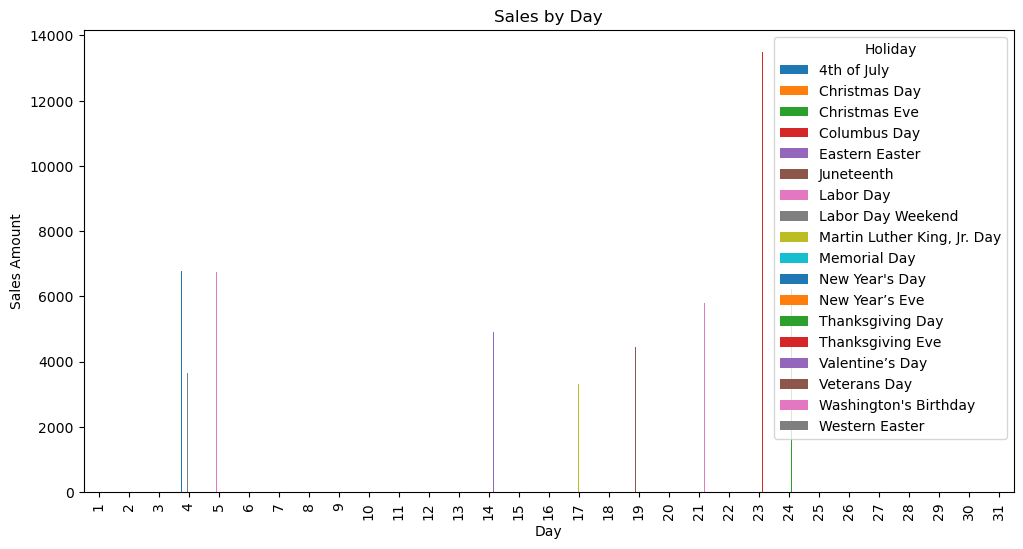

In [116]:

# analyze sales by customer day
sales_by_day = analyze_sales_by_customer_attribute('Day')
print('\nSales by day:')
print(sales_by_day)

# plot sales by day as a bar chart
sales_by_day.unstack().plot(kind='bar', figsize=(12,6))

# add labels and title
plt.xlabel('Day')
plt.ylabel('Sales Amount')
plt.title('Sales by Day')

# show the plot
plt.show()


Sales by year:
Year  Holiday              
2004  4th of July              0.0
      Christmas Day            0.0
      Christmas Eve            0.0
      Columbus Day             0.0
      Eastern Easter           0.0
                              ... 
2021  Thanksgiving Eve         0.0
      Valentine’s Day          0.0
      Veterans Day             0.0
      Washington's Birthday    0.0
      Western Easter           0.0
Name: Amount, Length: 324, dtype: float64


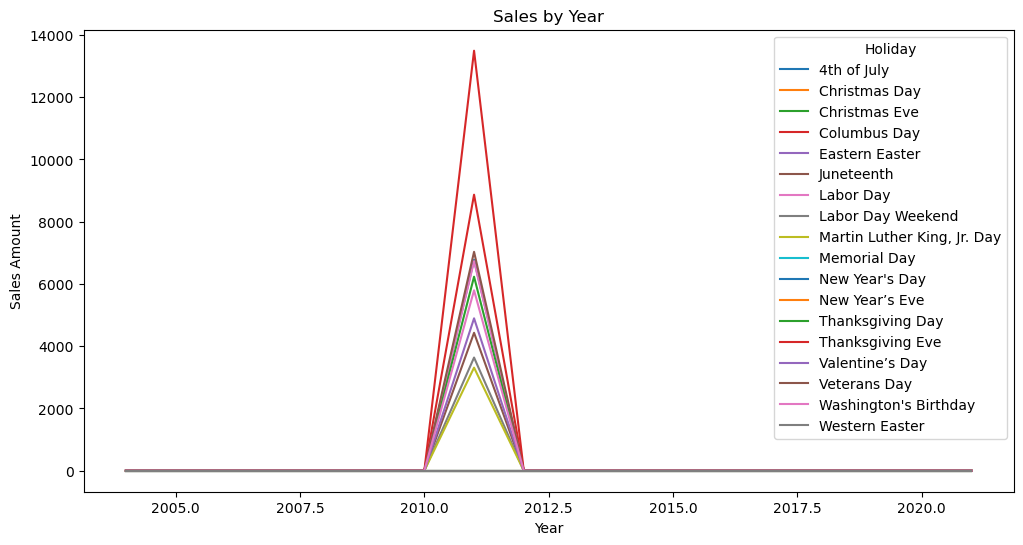

In [131]:
# analyze sales by customer year
sales_by_year = analyze_sales_by_customer_attribute('Year')
print('\nSales by year:')
print(sales_by_year)

# plot sales by year as a line chart
sales_by_year.unstack().plot(kind='line', figsize=(12,6))

# add labels and title
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title('Sales by Year')

# show the plot
plt.show()

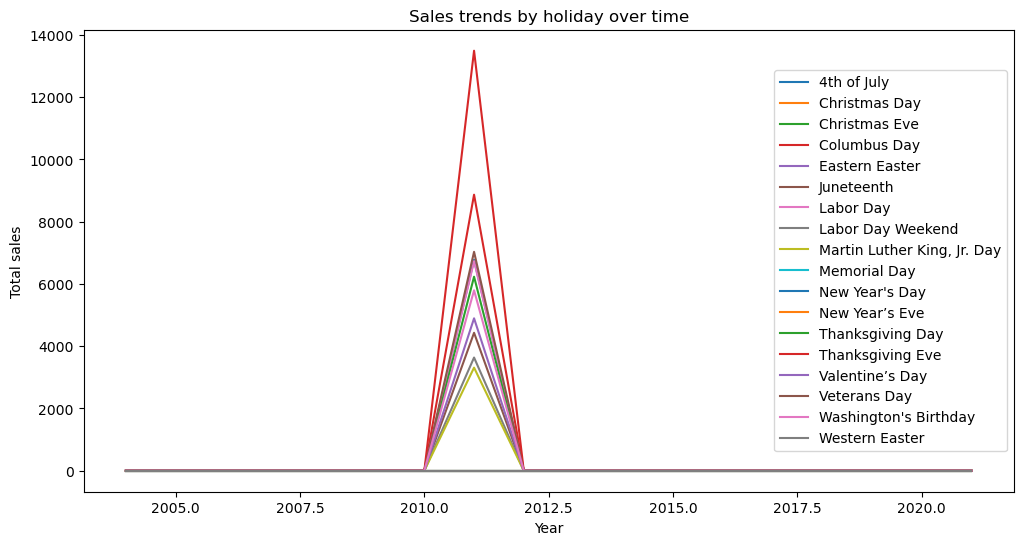

In [130]:
import matplotlib.pyplot as plt

# group the sales data by year and holiday
sales_by_year_holiday = merged_data.groupby(['Year', 'Holiday']).sum()['Amount']

# pivot the table to make the holiday names the columns
sales_by_year_holiday = sales_by_year_holiday.reset_index().pivot(index='Year', columns='Holiday', values='Amount')

# plot the total sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_by_year_holiday)

plt.xlabel('Year')
plt.ylabel('Total sales')
plt.legend(sales_by_year_holiday.columns, loc='right')
plt.title('Sales trends by holiday over time')

plt.show()

